Trabalho 

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prep4 import DataPreparation
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
prep = DataPreparation()

train_db = pd.read_csv("dataset/train_radiomics_hipocamp.csv")
test_db = pd.read_csv("dataset/test_radiomics_hipocamp.csv")
control_db = pd.read_csv("dataset/train_radiomics_occipital_CONTROL.csv")

train_db = prep.prep_train(train_db)
test_db = prep.transform(test_db)
control_db = prep.transform(control_db)

In [3]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2162 entries, diagnostics_Image-original_Dimensionality to Transition
dtypes: float64(2161), object(1)
memory usage: 5.0+ MB


In [4]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2161 entries, diagnostics_Image-original_Dimensionality to Age
dtypes: float64(2161)
memory usage: 1.6 MB


In [5]:
X = train_db.drop(columns=["Transition"]) 
y = train_db["Transition"]  

In [6]:
X_train = pd.read_csv('prep4/train_X.csv')
X_test = pd.read_csv('prep4/test_X.csv')
y_train = pd.read_csv('prep4/train_y.csv')
y_test = pd.read_csv('prep4/test_y.csv')

In [8]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Definindo os estimators
estimators = [
    ("gb", GradientBoostingClassifier(random_state=2024)),
    ("svm", SVC(probability=True, random_state=2024)),
    ("rf", RandomForestClassifier(random_state=2024))
]

# Modelo meta-aprendizagem
meta_learner = LogisticRegression(random_state=2024)

# StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=10,  
    n_jobs=-1
)

# Definindo os hiperparâmetros para busca
param_grid = {
    'svm__C': [0.1],                    
    'svm__kernel': ['poly'],         
    'svm__degree': [3], 
    'svm__gamma': ['scale'],

    # Random Forest
    'rf__n_estimators': [50],        
    'rf__max_depth': [10],              
    'rf__min_samples_split': [2],
    'rf__min_samples_leaf': [2],
    'rf__max_features': ['log2'],

    # Gradient Boosting
    'gb__n_estimators': [50],
    'gb__learning_rate': [0.1],
    'gb__max_depth': [10],
    'gb__min_samples_split': [5],
    'gb__min_samples_leaf': [10],

    'final_estimator__C': [1],
}

# Estratégia de validação cruzada
cv_strategy = StratifiedKFold(n_splits=10)

# GridSearchCV para o StackingClassifier
grid_search = GridSearchCV(
    estimator=stacking_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv_strategy,
    verbose=1,
    refit=True,
    n_jobs=-1
)

# Ajustando o modelo
grid_search.fit(X, y)

# Melhor conjunto de hiperparâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Melhor modelo treinado
best_model = grid_search.best_estimator_

# Validação cruzada com o melhor modelo
print("F1 Score médio com validação cruzada:", grid_search.best_score_)

# Avaliação no conjunto de teste
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Matriz de confusão e relatório de classificação
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class

Melhores parâmetros encontrados: {'final_estimator__C': 1, 'gb__learning_rate': 0.1, 'gb__max_depth': 10, 'gb__min_samples_leaf': 10, 'gb__min_samples_split': 5, 'gb__n_estimators': 50, 'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 50, 'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
F1 Score médio com validação cruzada: 0.32852303734912425


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less t

Matriz de Confusão:
[[ 6  1  0  3  2]
 [ 1 15  0  2  1]
 [ 0  2  0  0  0]
 [ 6  2  0  3  3]
 [ 4  8  0  2  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

       AD-AD       0.35      0.50      0.41        12
       CN-CN       0.54      0.79      0.64        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.30      0.21      0.25        14
     MCI-MCI       0.00      0.00      0.00        14

    accuracy                           0.39        61
   macro avg       0.24      0.30      0.26        61
weighted avg       0.31      0.39      0.34        61



/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

F1-Score no conjunto de controle: 0.16587130926403434


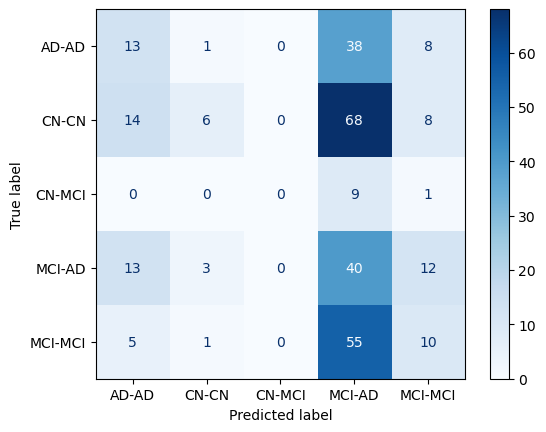


Relatório de Classificação no conjunto de controle:
              precision    recall  f1-score   support

       AD-AD       0.29      0.22      0.25        60
       CN-CN       0.55      0.06      0.11        96
      CN-MCI       0.00      0.00      0.00        10
      MCI-AD       0.19      0.59      0.29        68
     MCI-MCI       0.26      0.14      0.18        71

    accuracy                           0.23       305
   macro avg       0.26      0.20      0.17       305
weighted avg       0.33      0.23      0.19       305



/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [14]:
CX = control_db.drop(columns=["Transition"]) 
Cy = control_db["Transition"]  

control_pred = best_model.predict(CX)

control_f1_score = f1_score(Cy, control_pred, average='macro')
print("F1-Score no conjunto de controle:", control_f1_score)

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(Cy, control_pred, cmap='Blues')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação no conjunto de controle:")
print(classification_report(Cy, control_pred))


### Guardar o melhor modelo do stacking

In [ ]:
best_model.fit(X, y)
test_predictions = best_model.predict(test_db)

row_ids = range(1, len(test_predictions) + 1)

output_df = pd.DataFrame({
    "RowId": row_ids,
    "Result": test_predictions
})


output_df.to_csv("resultados/stck4.csv", index=False)